MACHINE LEARNING FOR REGRESSION ANALYSIS

In [226]:
import pandas as pd
import numpy as np

DATA PREPARATION

In [227]:
data = "https://raw.githubusercontent.com/comerenna/ML-for-Regression/refs/heads/main/car_fuel_efficiency.csv"

In [228]:
!wget $data

--2025-10-09 21:48:39--  https://raw.githubusercontent.com/comerenna/ML-for-Regression/refs/heads/main/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.008s  

2025-10-09 21:48:39 (108 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [229]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [230]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


TO CHECK THE LENGHT OF THE DATAFRAME

In [163]:
len(df)

9704

TO CHECK ON THE COLUMNS

In [164]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

TO FIND THE STRINGS COLUMNS

In [165]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [166]:
df.dtypes == "object"

engine_displacement    False
num_cylinders          False
horsepower             False
vehicle_weight         False
acceleration           False
model_year             False
origin                  True
fuel_type               True
drivetrain              True
num_doors              False
fuel_efficiency_mpg    False
dtype: bool

In [167]:
df.dtypes[df.dtypes == "object"]

origin        object
fuel_type     object
drivetrain    object
dtype: object

In [168]:
str_list = list(df.dtypes[df.dtypes == "object"].index)
str_list

for col in str_list:
    df[col] = df[col].str.lower().str.replace(" ","_").str.replace("-","_")

In [169]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all_wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front_wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front_wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all_wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all_wheel_drive,2.0,12.488369


THE DATASET TO USE IN THE QUESTION

In [170]:
base = df[["engine_displacement", "horsepower", "vehicle_weight", "model_year", "fuel_efficiency_mpg"]]

In [171]:
base

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


TO CHECK ON THE ROWS

In [172]:
base.index

RangeIndex(start=0, stop=9704, step=1)

In [173]:
base.values

array([[ 170.        ,  159.        , 3413.43375861, 2003.        ,
          13.23172891],
       [ 130.        ,   97.        , 3149.66493422, 2007.        ,
          13.68821744],
       [ 170.        ,   78.        , 3079.03899737, 2018.        ,
          14.246341  ],
       ...,
       [ 220.        ,  138.        , 2583.47131761, 2008.        ,
          17.18658678],
       [ 230.        ,  177.        , 2905.52738998, 2011.        ,
          15.33155059],
       [ 270.        ,  140.        , 2908.04347736, 2005.        ,
          14.8844674 ]], shape=(9704, 5))

TO SEE THE FIRST ROWS

In [174]:
base.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


TO CHECK ON THE LAST ROWS

In [175]:
base.tail()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551
9703,270,140.0,2908.043477,2005,14.884467


EXPLORATORY DATA ANALYSIS

In [176]:
base

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [177]:
# To see what we have in the data
for col in base.columns:
    print(col)
    print(base[col].head())
    print()

engine_displacement
0    170
1    130
2    170
3    220
4    210
Name: engine_displacement, dtype: int64

horsepower
0    159.0
1     97.0
2     78.0
3      NaN
4    140.0
Name: horsepower, dtype: float64

vehicle_weight
0    3413.433759
1    3149.664934
2    3079.038997
3    2542.392402
4    3460.870990
Name: vehicle_weight, dtype: float64

model_year
0    2003
1    2007
2    2018
3    2009
4    2009
Name: model_year, dtype: int64

fuel_efficiency_mpg
0    13.231729
1    13.688217
2    14.246341
3    16.912736
4    12.488369
Name: fuel_efficiency_mpg, dtype: float64



In [178]:
for col in base.columns:
    print(col)
    print(base[col].unique()[:5])
    print(base[col].nunique())
    print()

engine_displacement
[170 130 220 210 190]
36

horsepower
[159.  97.  78.  nan 140.]
192

vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

model_year
[2003 2007 2018 2009 2008]
24

fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704



THE DISTRIBUTION OF FUEL EFFICIENCY MPG

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

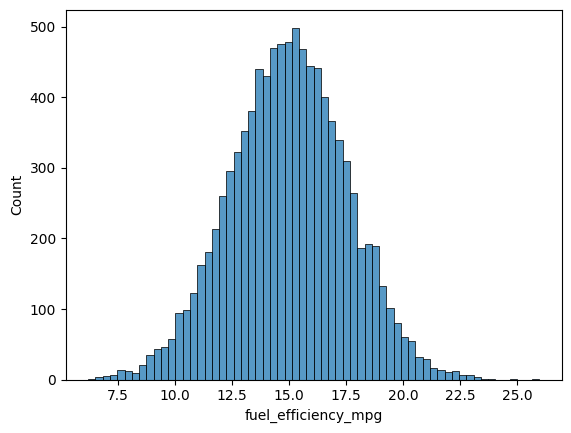

In [180]:
sns.histplot(base.fuel_efficiency_mpg)

In [181]:
sns.histplot(df1.fuel_efficiency_mpg, bins = 50)

NameError: name 'df1' is not defined

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

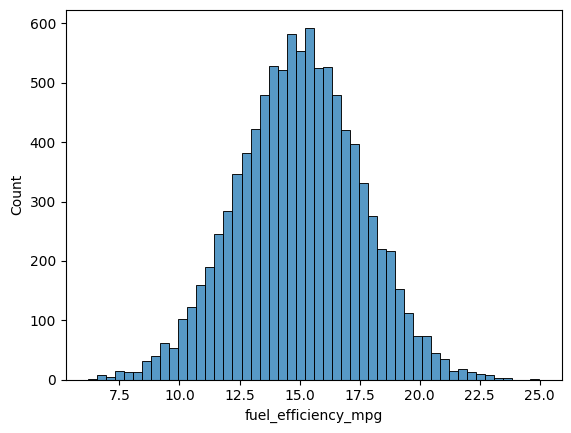

In [182]:
sns.histplot(base.fuel_efficiency_mpg[df.fuel_efficiency_mpg < 25.0], bins = 50)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

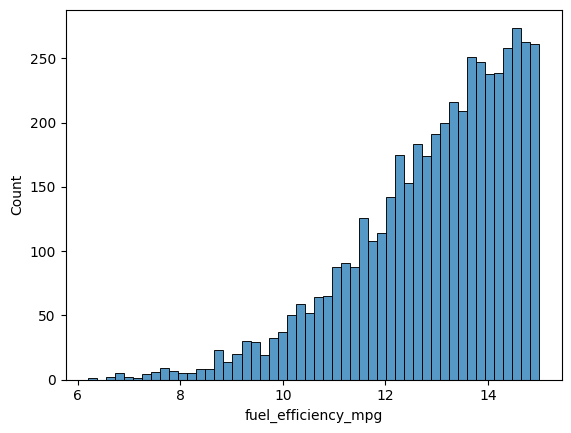

In [183]:
sns.histplot(base.fuel_efficiency_mpg[base.fuel_efficiency_mpg < 15.0], bins = 50)

In [184]:
base

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [185]:
fuel_frequency_logs = np.log1p(base.fuel_efficiency_mpg)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

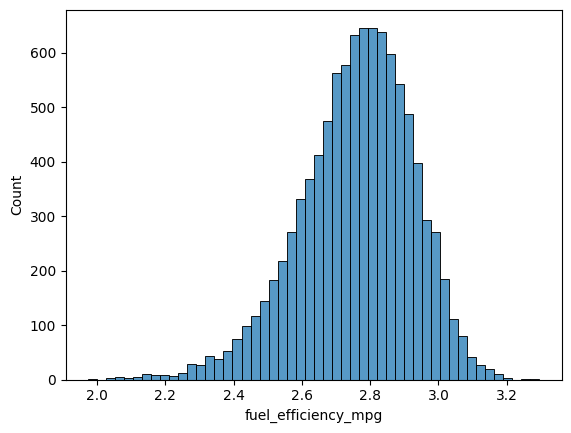

In [186]:
sns.histplot(fuel_frequency_logs, bins = 50)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

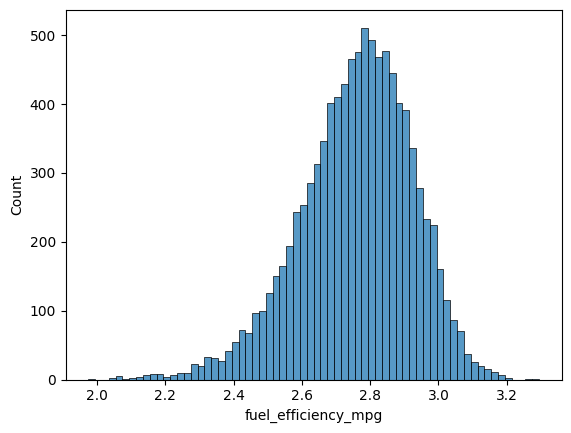

In [187]:
sns.histplot(fuel_frequency_logs)

TO FIND THE MISSING VALUES

In [188]:
base

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [189]:
base.isnull()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,True,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
9699,False,False,False,False,False
9700,False,False,False,False,False
9701,False,False,False,False,False
9702,False,False,False,False,False


TO SUM UP THE MISSING NUMBERS

In [190]:
base.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

SETTING UP VALIDATION FRAMEWORK

In [191]:
base

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [192]:
# To check the lenght of dataframe
p = len(base)
print(p)
print()
validation_data = int(p * 0.2)
print(validation_data)
print()
test_data = int(p * 0.2)
print(test_data)
print()
train_data = p - (validation_data + test_data)
print(train_data)


9704

1940

1940

5824


In [193]:
p, validation_data + test_data + train_data

(9704, 9704)

In [194]:
train_data, validation_data, test_data

(5824, 1940, 1940)

In [195]:
# splitting the dataset
df1_train = base.iloc[:train_data]
df1_val = base.iloc[train_data: train_data + validation_data]
df1_test = base.iloc[train_data + validation_data:]

In [196]:
len(df1_train), len(df1_val), len(df1_test)

(5824, 1940, 1940)

In [197]:
# Shuffling the dataset
idx = np.arange(p)

In [198]:
np.random.seed(42)
np.random.shuffle(idx)

In [199]:
# splitting the dataset
df1_train = base.iloc[idx[:train_data]]
df1_val = base.iloc[idx[train_data: train_data + validation_data]]
df1_test = base.iloc[idx[train_data + validation_data:]]

In [200]:
df1_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
1696,260,139.0,2606.972984,2009,16.964054
5685,280,132.0,4004.214323,2014,10.059094
6735,210,152.0,2500.175687,2020,17.593237
2052,250,154.0,2254.313245,2002,18.925748


In [201]:
len(df1_train), len(df1_val), len(df1_test)

(5824, 1940, 1940)

In [202]:
df1_train = df1_train.reset_index(drop = True)
df1_val = df1_val.reset_index(drop = True)
df1_test = df1_test.reset_index(drop = True)

In [203]:
df1_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
5819,260,139.0,2606.972984,2009,16.964054
5820,280,132.0,4004.214323,2014,10.059094
5821,210,152.0,2500.175687,2020,17.593237
5822,250,154.0,2254.313245,2002,18.925748


DO SOME TRANSFORMATION ON THE TARGET

In [204]:
y_train = np.log1p(df1_train.fuel_efficiency_mpg.values)
y_validation = np.log1p(df1_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df1_test.fuel_efficiency_mpg.values)

In [205]:
del df1_train["fuel_efficiency_mpg"]
del df1_val["fuel_efficiency_mpg"]
del df1_test["fuel_efficiency_mpg"]

In [206]:
len(y_train)

5824

In [207]:
df1_train

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006
...,...,...,...,...
5819,260,139.0,2606.972984,2009
5820,280,132.0,4004.214323,2014
5821,210,152.0,2500.175687,2020
5822,250,154.0,2254.313245,2002


In [208]:
df1_train.dtypes

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
dtype: object

In [209]:
df1_train.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year'], dtype='object')

In [210]:
base1= ["engine_displacement", "horsepower", "vehicle_weight", "model_year"]

In [211]:
df1_train[base1]

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006
...,...,...,...,...
5819,260,139.0,2606.972984,2009
5820,280,132.0,4004.214323,2014
5821,210,152.0,2500.175687,2020
5822,250,154.0,2254.313245,2002


In [212]:
X_train = df1_train[base1].values

In [213]:
X_train

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [214]:
y_train

array([2.8703359 , 2.85061269, 2.97511223, ..., 2.92279789, 2.99201277,
       2.94261017], shape=(5824,))

In [215]:
df1_train[base1].isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

TO REPLACE THE MISSING VALUE WITH (FILLNA(0))

In [216]:
X_train = df1_train[base1].fillna(0).values

In [217]:
X_train

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [218]:
y_train

array([2.8703359 , 2.85061269, 2.97511223, ..., 2.92279789, 2.99201277,
       2.94261017], shape=(5824,))

TRAIN OUR MODEL

In [219]:
train_linear_regression(X_train, y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'shapes'

In [220]:
print(train_linear_regression)

<function train_linear_regression at 0x7564a773ec00>


In [221]:
w0, w = train_linear_regression(X_train,y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'shapes'

In [222]:
df1_train.describe()

,engine_displacement,horsepower,vehicle_weight,model_year
count,5824.000000,5395.000000,5824.000000,5824.000000
mean,199.429945,149.544764,3006.672919,2011.444712
std,49.543177,29.610498,497.856998,6.669193
min,10.000000,46.000000,952.681761,2000.000000
25%,170.000000,129.000000,2669.313374,2006.000000
50%,200.000000,149.000000,2993.348283,2011.000000
75%,230.000000,170.000000,3342.151520,2017.000000
max,380.000000,246.000000,4610.973229,2023.000000


TO FIND THE MEDIAN AND OTHER STATISTICAL PARAMETERS

In [223]:
p= df1_train.horsepower.median()
print(p)

149.0


In [224]:
p= df1_train.horsepower.mean()
print(p)

149.54476367006487


In [225]:
p= df1_train.horsepower.std()
print(p)

29.61049810443748
